# Computational Drug Discovery - Machine Learning


We will be performing Data Collection and Pre-Processing from the ChEMBL Database.

#### **ChEMBL Database**

The [*ChEMBL Database*](https://www.ebi.ac.uk/chembl/) is a database that contains curated bioactivity data of more than 2 million compounds. It is compiled from more than 76,000 documents, 1.2 million assays and the data spans 13,000 targets and 1,800 cells and 33,000 indications.
[Data as of March 25, 2020; ChEMBL version 26].

## **Importing libraries**

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client
# chembl_webresource_client is a Python client for accessing ChEMBL data via the RESTful web services interface.
# this library is used to access ChEMBL database and retrieve bioactivity data for our target of interest.
# ChEMBL is a manually curated database of bioactive molecules with drug-like properties.

## **Search for Target protein**

In [3]:
# initialize the target search of chembl
target = new_client.target
target_query = target.search('Breast cancer') # list of dictionaries is returned
targets = pd.DataFrame.from_dict(target_query) # convert to dataframe
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P38398', 'xref_name': None, 'xre...",Homo sapiens,Breast cancer type 1 susceptibility protein,26.0,False,CHEMBL5990,"[{'accession': 'P38398', 'component_descriptio...",SINGLE PROTEIN,9606.0
1,[],Homo sapiens,Breast cancer cell lines,22.0,False,CHEMBL614788,[],CELL-LINE,9606.0
2,"[{'xref_id': 'Q7RTN6', 'xref_name': None, 'xre...",Homo sapiens,STE20-related kinase adapter protein alpha,19.0,False,CHEMBL1795198,"[{'accession': 'Q7RTN6', 'component_descriptio...",SINGLE PROTEIN,9606.0
3,[],Homo sapiens,Kinesin-like protein KIF15,19.0,False,CHEMBL3632454,"[{'accession': 'Q9NS87', 'component_descriptio...",SINGLE PROTEIN,9606.0
4,[],Mus musculus,ATP-binding cassette sub-family G member 2,17.0,False,CHEMBL2073705,"[{'accession': 'Q7TMS5', 'component_descriptio...",SINGLE PROTEIN,10090.0
...,...,...,...,...,...,...,...,...,...
77,[],Homo sapiens,Serine/threonine-protein kinase Aurora,3.0,False,CHEMBL3430911,"[{'accession': 'Q96GD4', 'component_descriptio...",PROTEIN FAMILY,9606.0
78,[],Homo sapiens,Speckle-type POZ protein/PTEN,3.0,False,CHEMBL4523606,"[{'accession': 'P60484', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606.0
79,[],Homo sapiens,26S proteasome,1.0,False,CHEMBL2364701,"[{'accession': 'Q99460', 'component_descriptio...",PROTEIN COMPLEX,9606.0
80,[],Homo sapiens,Mitochondrial complex I (NADH dehydrogenase),0.0,False,CHEMBL2363065,"[{'accession': 'P03923', 'component_descriptio...",PROTEIN COMPLEX,9606.0


In [4]:
# Select and retrieve bioactivity data for the target of interest 
selected_target = targets.target_chembl_id[9]
# initialize the bioactivity data
activity = new_client.activity
# retrieve the bioactivity data for the selected target of interest with IC50 as standard type
# IC50 is the concentration of a drug required to inhibit the growth of a microorganism by 50%.
# The IC50 is a measure of the potency of a drug.
# The lower the IC50 value, the more potent the drug.
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
df = pd.DataFrame.from_dict(res)
print(df.shape)
df.head

(240, 45)


<bound method NDFrame.head of     activity_comment  activity_id activity_properties assay_chembl_id  \
0             active      8226677                  []   CHEMBL1963969   
1             active      8226678                  []   CHEMBL1963969   
2             active      8226679                  []   CHEMBL1963969   
3             active      8226680                  []   CHEMBL1963969   
4             active      8226681                  []   CHEMBL1963969   
..               ...          ...                 ...             ...   
235           active      8260894                  []   CHEMBL1963969   
236           active      8260895                  []   CHEMBL1963969   
237           active      8260896                  []   CHEMBL1963969   
238           active      8260897                  []   CHEMBL1963969   
239           active      8331638                  []   CHEMBL1963969   

                                     assay_description assay_type  \
0    PUBCHEM_BIOASSAY: C

Finally we will save the resulting bioactivity data to a CSV file **bioactivity_data.csv**.

In [5]:
df.to_csv('Data/01_bioactivity_data_raw.csv', index=False)

## **Handling missing data**
If any compounds has missing value for the **standard_value** and **canonical_smiles** column then drop it.

In [6]:
# Remove columns with missing values in the standard_value column
df2 = df[df.standard_value.notna()]
# Remove columns with missing values in the canonical_smiles column
# canonical_smiles is a unique representation of a molecule in the form of a string.
# example: Cc1ccccc1C(=O)Nc1ccc(O)cc1
# we will use this column to calculate molecular descriptors
# molecular descriptors are numerical values that describe the chemical properties of a molecule.
df2 = df2[df.canonical_smiles.notna()]
df2.head(3)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,active,8226677,[],CHEMBL1963969,PUBCHEM_BIOASSAY: Counterscreen for inhibitors...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Nuclear receptor coactivator 3,9606,None,None,IC50,uM,UO_0000065,None,7.339
1,active,8226678,[],CHEMBL1963969,PUBCHEM_BIOASSAY: Counterscreen for inhibitors...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Nuclear receptor coactivator 3,9606,None,None,IC50,uM,UO_0000065,None,4.313
2,active,8226679,[],CHEMBL1963969,PUBCHEM_BIOASSAY: Counterscreen for inhibitors...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Nuclear receptor coactivator 3,9606,None,None,IC50,uM,UO_0000065,None,3.755


In [7]:
# remove duplicate data
print(len(df2.canonical_smiles.unique()))
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr.shape

240


(240, 45)

## **Data pre-processing of the bioactivity data**

**Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame**

In [8]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL1443177,Nc1ccc(Oc2ccccc2-c2ccccc2)cc1,7339.0
1,CHEMBL1980684,COc1cccc(/C=N/NC(=O)CNC(=O)C2COc3ccccc3O2)c1O,4313.0
2,CHEMBL1385327,COC(CN(C(=O)CCl)C(C(=O)NC1CCCCC1)c1ccccc1C)OC,3755.0
3,CHEMBL1316462,COc1cccc(CNc2ncnc3ccc(-c4c(C)noc4C)cc23)c1,9920.0
4,CHEMBL1893675,COc1ccccc1-c1cc2nc(-c3ccccc3)cc(N3CCN(C(=O)c4c...,5661.0
...,...,...,...
235,CHEMBL1380143,C=CCn1c(Oc2ccccc2F)nc2c1c(=O)n(C)c(=O)n2C,3362.0
236,CHEMBL1502254,Cc1ccc(OCC(=O)c2cc(C)n(-c3ccccc3)c2C)c([N+](=O...,2458.0
237,CHEMBL1413003,Cc1nn(CC(=O)N2CCN(c3cccc(C(F)(F)F)c3)CC2)c(=O)...,5112.0
238,CHEMBL1729353,O=C(COC(=O)c1cccnc1O)Nc1ccc(N2CCCCC2)cc1,5345.0


Saves dataframe to CSV file

In [9]:
df3.to_csv('Data/02_bioactivity_data_preprocessed.csv', index=False)

### **Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**. 

In [10]:
df4 = pd.read_csv('Data/02_bioactivity_data_preprocessed.csv')

In [11]:
# activity_class is a new column that will be created to classify the bioactivity of the molecules
# based on the standard_value column
def bioactivity_level(value):
  if value >= 10000:
    return "inactive"
  elif value <= 1000:
    return "active"
  else:
    return "intermediate"

df4['class'] = df4['standard_value'].apply(lambda x: bioactivity_level(float(x)))
df4

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL1443177,Nc1ccc(Oc2ccccc2-c2ccccc2)cc1,7339.0,intermediate
1,CHEMBL1980684,COc1cccc(/C=N/NC(=O)CNC(=O)C2COc3ccccc3O2)c1O,4313.0,intermediate
2,CHEMBL1385327,COC(CN(C(=O)CCl)C(C(=O)NC1CCCCC1)c1ccccc1C)OC,3755.0,intermediate
3,CHEMBL1316462,COc1cccc(CNc2ncnc3ccc(-c4c(C)noc4C)cc23)c1,9920.0,intermediate
4,CHEMBL1893675,COc1ccccc1-c1cc2nc(-c3ccccc3)cc(N3CCN(C(=O)c4c...,5661.0,intermediate
...,...,...,...,...
235,CHEMBL1380143,C=CCn1c(Oc2ccccc2F)nc2c1c(=O)n(C)c(=O)n2C,3362.0,intermediate
236,CHEMBL1502254,Cc1ccc(OCC(=O)c2cc(C)n(-c3ccccc3)c2C)c([N+](=O...,2458.0,intermediate
237,CHEMBL1413003,Cc1nn(CC(=O)N2CCN(c3cccc(C(F)(F)F)c3)CC2)c(=O)...,5112.0,intermediate
238,CHEMBL1729353,O=C(COC(=O)c1cccnc1O)Nc1ccc(N2CCCCC2)cc1,5345.0,intermediate


Saves dataframe to CSV file

In [12]:
df4.to_csv('Data/03_bioactivity_data_curated.csv', index=False)

# Computational Drug Discovery [Part 2]

 Exploratory Data Analysis**

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.


rdkit is a cheminformatics library that is used to perform various tasks in computational chemistry. It is used to perform tasks such as descriptor calculation, molecular visualization, and molecular similarity calculations.

## **Load bioactivity data**

In [13]:
df = pd.read_csv('Data/03_bioactivity_data_curated.csv')
df.head(3)

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL1443177,Nc1ccc(Oc2ccccc2-c2ccccc2)cc1,7339.0,intermediate
1,CHEMBL1980684,COc1cccc(/C=N/NC(=O)CNC(=O)C2COc3ccccc3O2)c1O,4313.0,intermediate
2,CHEMBL1385327,COC(CN(C(=O)CCl)C(C(=O)NC1CCCCC1)c1ccccc1C)OC,3755.0,intermediate


In [14]:
df_clean_smiles = df.copy()
df_clean_smiles['canonical_smiles'] = df_clean_smiles['canonical_smiles'].str.split('.').apply(lambda x: max(x, key=len))
df_clean_smiles

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL1443177,Nc1ccc(Oc2ccccc2-c2ccccc2)cc1,7339.0,intermediate
1,CHEMBL1980684,COc1cccc(/C=N/NC(=O)CNC(=O)C2COc3ccccc3O2)c1O,4313.0,intermediate
2,CHEMBL1385327,COC(CN(C(=O)CCl)C(C(=O)NC1CCCCC1)c1ccccc1C)OC,3755.0,intermediate
3,CHEMBL1316462,COc1cccc(CNc2ncnc3ccc(-c4c(C)noc4C)cc23)c1,9920.0,intermediate
4,CHEMBL1893675,COc1ccccc1-c1cc2nc(-c3ccccc3)cc(N3CCN(C(=O)c4c...,5661.0,intermediate
...,...,...,...,...
235,CHEMBL1380143,C=CCn1c(Oc2ccccc2F)nc2c1c(=O)n(C)c(=O)n2C,3362.0,intermediate
236,CHEMBL1502254,Cc1ccc(OCC(=O)c2cc(C)n(-c3ccccc3)c2C)c([N+](=O...,2458.0,intermediate
237,CHEMBL1413003,Cc1nn(CC(=O)N2CCN(c3cccc(C(F)(F)F)c3)CC2)c(=O)...,5112.0,intermediate
238,CHEMBL1729353,O=C(COC(=O)c1cccnc1O)Nc1ccc(N2CCCCC2)cc1,5345.0,intermediate


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [15]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [16]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [17]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,261.324,4.72810,1.0,2.0
1,385.376,0.80710,3.0,7.0
2,410.942,3.17132,1.0,4.0
3,360.417,4.52234,1.0,6.0
4,479.540,4.62730,0.0,7.0
...,...,...,...,...
235,330.319,1.55110,0.0,7.0
236,365.389,3.96746,0.0,6.0
237,419.407,2.17202,0.0,6.0
238,355.394,2.57300,2.0,6.0


### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [18]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,261.324,4.72810,1.0,2.0
1,385.376,0.80710,3.0,7.0
2,410.942,3.17132,1.0,4.0
3,360.417,4.52234,1.0,6.0
4,479.540,4.62730,0.0,7.0
...,...,...,...,...
235,330.319,1.55110,0.0,7.0
236,365.389,3.96746,0.0,6.0
237,419.407,2.17202,0.0,6.0
238,355.394,2.57300,2.0,6.0


In [19]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL1443177,Nc1ccc(Oc2ccccc2-c2ccccc2)cc1,7339.0,intermediate
1,CHEMBL1980684,COc1cccc(/C=N/NC(=O)CNC(=O)C2COc3ccccc3O2)c1O,4313.0,intermediate
2,CHEMBL1385327,COC(CN(C(=O)CCl)C(C(=O)NC1CCCCC1)c1ccccc1C)OC,3755.0,intermediate
3,CHEMBL1316462,COc1cccc(CNc2ncnc3ccc(-c4c(C)noc4C)cc23)c1,9920.0,intermediate
4,CHEMBL1893675,COc1ccccc1-c1cc2nc(-c3ccccc3)cc(N3CCN(C(=O)c4c...,5661.0,intermediate
...,...,...,...,...
235,CHEMBL1380143,C=CCn1c(Oc2ccccc2F)nc2c1c(=O)n(C)c(=O)n2C,3362.0,intermediate
236,CHEMBL1502254,Cc1ccc(OCC(=O)c2cc(C)n(-c3ccccc3)c2C)c([N+](=O...,2458.0,intermediate
237,CHEMBL1413003,Cc1nn(CC(=O)N2CCN(c3cccc(C(F)(F)F)c3)CC2)c(=O)...,5112.0,intermediate
238,CHEMBL1729353,O=C(COC(=O)c1cccnc1O)Nc1ccc(N2CCCCC2)cc1,5345.0,intermediate


Now, let's combine the 2 DataFrame

In [20]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [21]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL1443177,Nc1ccc(Oc2ccccc2-c2ccccc2)cc1,7339.0,intermediate,261.324,4.72810,1.0,2.0
1,CHEMBL1980684,COc1cccc(/C=N/NC(=O)CNC(=O)C2COc3ccccc3O2)c1O,4313.0,intermediate,385.376,0.80710,3.0,7.0
2,CHEMBL1385327,COC(CN(C(=O)CCl)C(C(=O)NC1CCCCC1)c1ccccc1C)OC,3755.0,intermediate,410.942,3.17132,1.0,4.0
3,CHEMBL1316462,COc1cccc(CNc2ncnc3ccc(-c4c(C)noc4C)cc23)c1,9920.0,intermediate,360.417,4.52234,1.0,6.0
4,CHEMBL1893675,COc1ccccc1-c1cc2nc(-c3ccccc3)cc(N3CCN(C(=O)c4c...,5661.0,intermediate,479.540,4.62730,0.0,7.0
...,...,...,...,...,...,...,...,...
235,CHEMBL1380143,C=CCn1c(Oc2ccccc2F)nc2c1c(=O)n(C)c(=O)n2C,3362.0,intermediate,330.319,1.55110,0.0,7.0
236,CHEMBL1502254,Cc1ccc(OCC(=O)c2cc(C)n(-c3ccccc3)c2C)c([N+](=O...,2458.0,intermediate,365.389,3.96746,0.0,6.0
237,CHEMBL1413003,Cc1nn(CC(=O)N2CCN(c3cccc(C(F)(F)F)c3)CC2)c(=O)...,5112.0,intermediate,419.407,2.17202,0.0,6.0
238,CHEMBL1729353,O=C(COC(=O)c1cccnc1O)Nc1ccc(N2CCCCC2)cc1,5345.0,intermediate,355.394,2.57300,2.0,6.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [22]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [23]:
df_combined.standard_value.describe()

count      240.000000
mean      8181.039583
std       8311.355668
min         18.610000
25%       3443.000000
50%       5667.000000
75%      10144.250000
max      35910.000000
Name: standard_value, dtype: float64

In [24]:
-np.log10( (10**-9)* 100000000 )

1.0

In [25]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [26]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [27]:
df_norm = norm_value(df_combined)
df_norm

/tmp/ipykernel_149084/3416609517.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL1443177,Nc1ccc(Oc2ccccc2-c2ccccc2)cc1,intermediate,261.324,4.72810,1.0,2.0,7339.0
1,CHEMBL1980684,COc1cccc(/C=N/NC(=O)CNC(=O)C2COc3ccccc3O2)c1O,intermediate,385.376,0.80710,3.0,7.0,4313.0
2,CHEMBL1385327,COC(CN(C(=O)CCl)C(C(=O)NC1CCCCC1)c1ccccc1C)OC,intermediate,410.942,3.17132,1.0,4.0,3755.0
3,CHEMBL1316462,COc1cccc(CNc2ncnc3ccc(-c4c(C)noc4C)cc23)c1,intermediate,360.417,4.52234,1.0,6.0,9920.0
4,CHEMBL1893675,COc1ccccc1-c1cc2nc(-c3ccccc3)cc(N3CCN(C(=O)c4c...,intermediate,479.540,4.62730,0.0,7.0,5661.0
...,...,...,...,...,...,...,...,...
235,CHEMBL1380143,C=CCn1c(Oc2ccccc2F)nc2c1c(=O)n(C)c(=O)n2C,intermediate,330.319,1.55110,0.0,7.0,3362.0
236,CHEMBL1502254,Cc1ccc(OCC(=O)c2cc(C)n(-c3ccccc3)c2C)c([N+](=O...,intermediate,365.389,3.96746,0.0,6.0,2458.0
237,CHEMBL1413003,Cc1nn(CC(=O)N2CCN(c3cccc(C(F)(F)F)c3)CC2)c(=O)...,intermediate,419.407,2.17202,0.0,6.0,5112.0
238,CHEMBL1729353,O=C(COC(=O)c1cccnc1O)Nc1ccc(N2CCCCC2)cc1,intermediate,355.394,2.57300,2.0,6.0,5345.0


In [28]:
df_norm.standard_value_norm.describe()

count      240.000000
mean      8181.039583
std       8311.355668
min         18.610000
25%       3443.000000
50%       5667.000000
75%      10144.250000
max      35910.000000
Name: standard_value_norm, dtype: float64

In [29]:
df_final = pIC50(df_norm)
df_final

/tmp/ipykernel_149084/3442786292.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1443177,Nc1ccc(Oc2ccccc2-c2ccccc2)cc1,intermediate,261.324,4.72810,1.0,2.0,5.134363
1,CHEMBL1980684,COc1cccc(/C=N/NC(=O)CNC(=O)C2COc3ccccc3O2)c1O,intermediate,385.376,0.80710,3.0,7.0,5.365221
2,CHEMBL1385327,COC(CN(C(=O)CCl)C(C(=O)NC1CCCCC1)c1ccccc1C)OC,intermediate,410.942,3.17132,1.0,4.0,5.425390
3,CHEMBL1316462,COc1cccc(CNc2ncnc3ccc(-c4c(C)noc4C)cc23)c1,intermediate,360.417,4.52234,1.0,6.0,5.003488
4,CHEMBL1893675,COc1ccccc1-c1cc2nc(-c3ccccc3)cc(N3CCN(C(=O)c4c...,intermediate,479.540,4.62730,0.0,7.0,5.247107
...,...,...,...,...,...,...,...,...
235,CHEMBL1380143,C=CCn1c(Oc2ccccc2F)nc2c1c(=O)n(C)c(=O)n2C,intermediate,330.319,1.55110,0.0,7.0,5.473402
236,CHEMBL1502254,Cc1ccc(OCC(=O)c2cc(C)n(-c3ccccc3)c2C)c([N+](=O...,intermediate,365.389,3.96746,0.0,6.0,5.609418
237,CHEMBL1413003,Cc1nn(CC(=O)N2CCN(c3cccc(C(F)(F)F)c3)CC2)c(=O)...,intermediate,419.407,2.17202,0.0,6.0,5.291409
238,CHEMBL1729353,O=C(COC(=O)c1cccnc1O)Nc1ccc(N2CCCCC2)cc1,intermediate,355.394,2.57300,2.0,6.0,5.272052


In [30]:
df_final.pIC50.describe()

count    240.000000
mean       5.290358
std        0.482267
min        4.444785
25%        4.993784
50%        5.246647
75%        5.463103
max        7.730254
Name: pIC50, dtype: float64

Let's write this to CSV file.

In [31]:
df_final.to_csv('Data/04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [32]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
5,CHEMBL1323983,CCCCC(=O)Nc1cccn2ncnc12,inactive,218.260,1.85800,1.0,4.0,4.964050
8,CHEMBL1992293,CCn1c2ccccc2c2cnc(/N=C/N(C)C)c(C#N)c21,inactive,291.358,3.30248,0.0,4.0,4.945464
9,CHEMBL1987516,O=C(N/N=C/c1cc(Br)ccc1O)C(c1ccncc1)N1CCOCC1,inactive,419.279,2.07330,2.0,6.0,4.922341
11,CHEMBL426,CN(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)NC(CCC(=O)...,inactive,454.447,0.26840,5.0,10.0,4.445051
14,CHEMBL1611106,O=C(CCl)N1N=C(c2ccco2)CC1c1cccs1,active,294.763,3.25760,0.0,4.0,6.158428
...,...,...,...,...,...,...,...,...
217,CHEMBL1345229,CC1CCN(C(=O)c2scc3c2OCCO3)CC1,inactive,267.350,2.39140,0.0,4.0,4.998396
221,CHEMBL2001316,CCOc1cccc(/C=N/NC(=O)c2cc(C3CC3)[nH]n2)c1O,inactive,314.345,2.15530,3.0,5.0,4.828771
222,CHEMBL1440892,COc1ccc(-c2cc(=O)oc3c(C)c(O)c(CN(C)C)cc23)cc1,inactive,339.391,3.54422,1.0,5.0,4.918041
227,CHEMBL1546346,CCc1c(C)nc2c(C)cccc2c1SCCC#N,inactive,270.401,4.41982,0.0,3.0,4.866397


Let's write this to CSV file.

In [33]:
df_2class.to_csv('Data/05_bioactivity_data_2class_pIC50.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [34]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

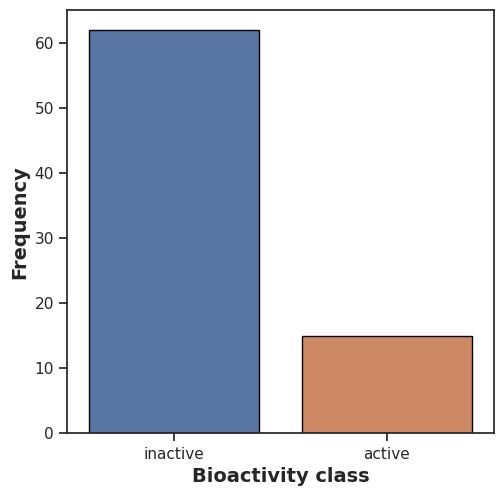

In [35]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

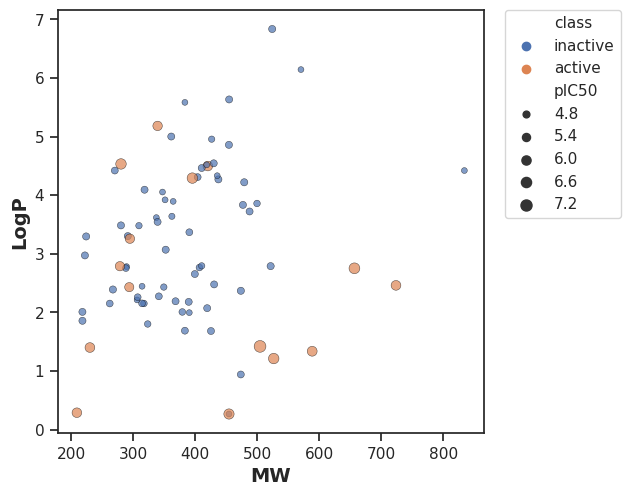

In [36]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

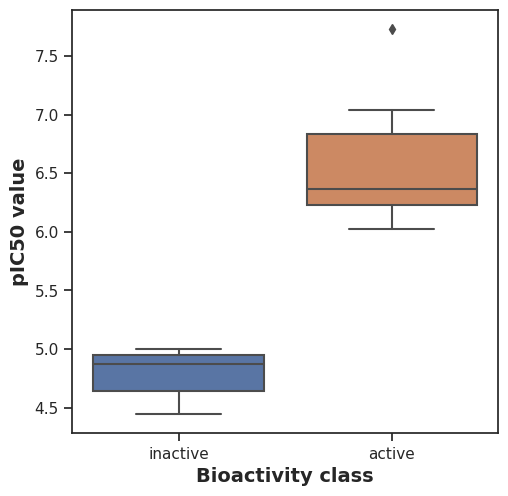

In [37]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [38]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [39]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,930.0,2.309028e-09,0.05,Different distribution (reject H0)


#### **MW**

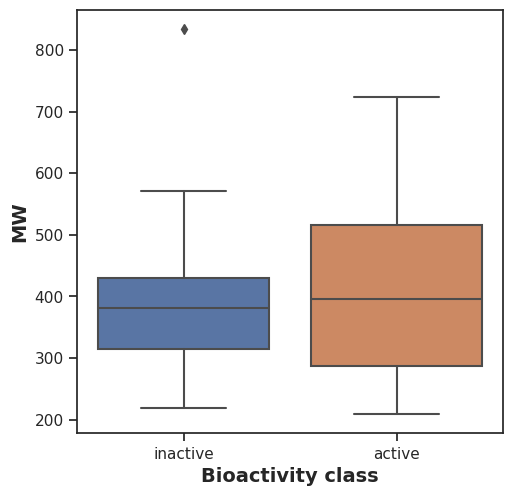

In [40]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [41]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,492.5,0.728388,0.05,Same distribution (fail to reject H0)


#### **LogP**

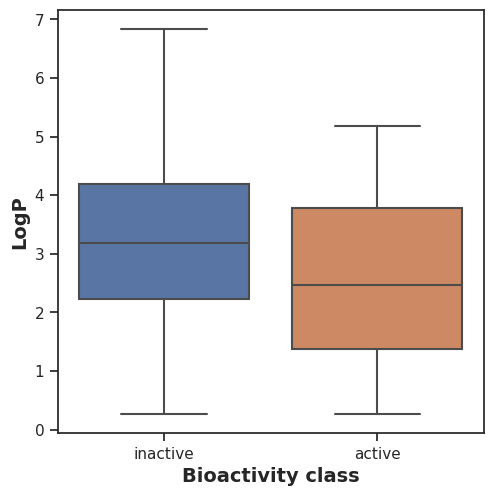

In [42]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [43]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,346.5,0.129089,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

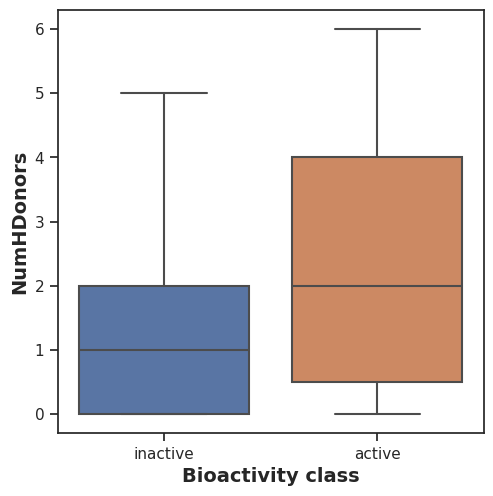

In [44]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [45]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,626.0,0.032643,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

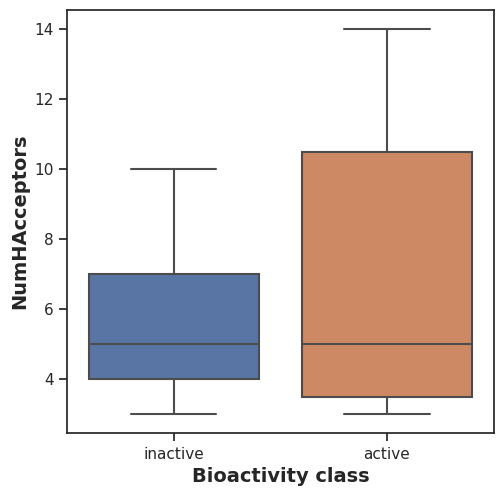

In [46]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [47]:
# save  mannwhitney('NumHAcceptors') in Data folder
mannwhitney('NumHAcceptors')


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,502.5,0.629828,0.05,Same distribution (fail to reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

## **Zip files**

In [48]:
! zip -r EDA_results.zip . -i *.csv *.pdf *.png
! rm *.csv *.pdf *.png
! mv EDA_results.zip Data/

  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_MW_vs_LogP.pdf (deflated 17%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: mannwhitneyu_LogP.csv (deflated 7%)
  adding: plot_ic50.pdf (deflated 38%)
  adding: plot_bioactivity_class.pdf (deflated 37%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: mannwhitneyu_pIC50.csv (deflated 11%)
  adding: plot_MW.pdf (deflated 37%)
rm: cannot remove '*.png': No such file or directory


# Computational Drug Discovery [Part 3] 

Descriptor Calculation and Dataset Preparation

In **Part 3**, we will be calculating molecular descriptors that are essentially quantitative description of the compounds in the dataset. Finally, we will be preparing this into a dataset for subsequent model building in Part 4.

---

## **Load bioactivity data**

Download the curated ChEMBL bioactivity data that has been pre-processed from Parts 1 and 2 of this Bioinformatics Project series. Here we will be using the **bioactivity_data_3class_pIC50.csv** file that essentially contain the pIC50 values that we will be using for building a regression model.

In [49]:
import pandas as pd
df3 = pd.read_csv('Data/04_bioactivity_data_3class_pIC50.csv')

In [50]:
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL1443177,Nc1ccc(Oc2ccccc2-c2ccccc2)cc1,intermediate,261.324,4.72810,1.0,2.0,5.134363
1,1,CHEMBL1980684,COc1cccc(/C=N/NC(=O)CNC(=O)C2COc3ccccc3O2)c1O,intermediate,385.376,0.80710,3.0,7.0,5.365221
2,2,CHEMBL1385327,COC(CN(C(=O)CCl)C(C(=O)NC1CCCCC1)c1ccccc1C)OC,intermediate,410.942,3.17132,1.0,4.0,5.425390
3,3,CHEMBL1316462,COc1cccc(CNc2ncnc3ccc(-c4c(C)noc4C)cc23)c1,intermediate,360.417,4.52234,1.0,6.0,5.003488
4,4,CHEMBL1893675,COc1ccccc1-c1cc2nc(-c3ccccc3)cc(N3CCN(C(=O)c4c...,intermediate,479.540,4.62730,0.0,7.0,5.247107
...,...,...,...,...,...,...,...,...,...
235,235,CHEMBL1380143,C=CCn1c(Oc2ccccc2F)nc2c1c(=O)n(C)c(=O)n2C,intermediate,330.319,1.55110,0.0,7.0,5.473402
236,236,CHEMBL1502254,Cc1ccc(OCC(=O)c2cc(C)n(-c3ccccc3)c2C)c([N+](=O...,intermediate,365.389,3.96746,0.0,6.0,5.609418
237,237,CHEMBL1413003,Cc1nn(CC(=O)N2CCN(c3cccc(C(F)(F)F)c3)CC2)c(=O)...,intermediate,419.407,2.17202,0.0,6.0,5.291409
238,238,CHEMBL1729353,O=C(COC(=O)c1cccnc1O)Nc1ccc(N2CCCCC2)cc1,intermediate,355.394,2.57300,2.0,6.0,5.272052


In [51]:

selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('Data/molecule.smi', sep='\t', index=False, header=False)
! cp Data/molecule.smi .

In [52]:
! cat Data/molecule.smi | head -5

Nc1ccc(Oc2ccccc2-c2ccccc2)cc1	CHEMBL1443177
COc1cccc(/C=N/NC(=O)CNC(=O)C2COc3ccccc3O2)c1O	CHEMBL1980684
COC(CN(C(=O)CCl)C(C(=O)NC1CCCCC1)c1ccccc1C)OC	CHEMBL1385327
COc1cccc(CNc2ncnc3ccc(-c4c(C)noc4C)cc23)c1	CHEMBL1316462
COc1ccccc1-c1cc2nc(-c3ccccc3)cc(N3CCN(C(=O)c4ccco4)CC3)n2n1	CHEMBL1893675


In [53]:
! cat Data/molecule.smi | wc -l

240


## **Calculate fingerprint descriptors**


### **Calculate PaDEL descriptors**

In [54]:
! mv padel/padel.sh .
! mv padel/padel.zip .
! unzip padel.zip
! cat padel.sh | bash

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [55]:
! mv padel.zip padel.sh padel
! rm -r ./__MACOSX
! rm -r ./PaDEL-Descriptor
! rm molecule.smi 
! mv descriptors_output.csv Data


## **Preparing the X and Y Data Matrices**

### **X data matrix**

In [56]:
df3_X = pd.read_csv('Data/descriptors_output.csv')

In [57]:
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL1385327,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL1980684,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL1323983,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL1316462,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL1443177,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,CHEMBL1881832,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
236,CHEMBL1502254,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
237,CHEMBL1479201,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
238,CHEMBL1729353,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
236,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
237,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
238,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## **Y variable**

### **Convert IC50 to pIC50**

In [59]:
df3_Y = df3['pIC50']
df3_Y

0      5.134363
1      5.365221
2      5.425390
3      5.003488
4      5.247107
         ...   
235    5.473402
236    5.609418
237    5.291409
238    5.272052
239    5.076290
Name: pIC50, Length: 240, dtype: float64

## **Combining X and Y variable**

In [60]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.134363
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.365221
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.425390
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.003488
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.247107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.473402
236,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.609418
237,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.291409
238,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.272052


In [61]:
dataset3.to_csv('Data/06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

# Bioinformatics Project - Computational Drug Discovery [Part 4] 

### Regression Models with Random Forest



In **Part 4**, we will be building a regression model of acetylcholinesterase inhibitors using the random forest algorithm.

---

## **1. Import libraries**

In [62]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [63]:
df = pd.read_csv('Data/06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [64]:
# remove any rows with missing values
df = df.dropna()

## **3. Input features**


### **3.1. Input features**

In [65]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
236,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
237,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
238,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [66]:
Y = df.pIC50
Y

0      5.134363
1      5.365221
2      5.425390
3      5.003488
4      5.247107
         ...   
235    5.473402
236    5.609418
237    5.291409
238    5.272052
239    5.076290
Name: pIC50, Length: 240, dtype: float64

### **3.3. Let's examine the data dimension**

In [67]:
X.shape

(240, 881)

In [68]:
Y.shape

(240,)

### **3.4. Remove low variance features**

In [69]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [70]:
X.shape

(240, 169)

## **4. Data split (80/20 ratio)**

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [72]:
X_train.shape, Y_train.shape

((192, 169), (192,))

In [73]:
X_test.shape, Y_test.shape

((48, 169), (48,))

## **5. Building a Regression Model using Random Forest**

In [74]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

-0.06596508203395457

In [75]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

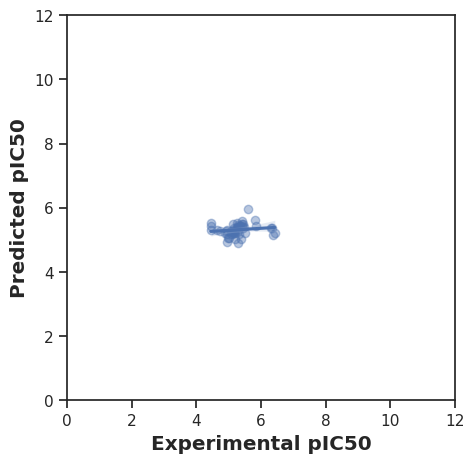

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'Experimental': Y_test, 'Predicted': Y_pred})
ax = sns.regplot(x='Experimental', y='Predicted', data=df, scatter_kws={'alpha': 0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()

# **Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors**


In Part 5, we will be comparing several ML algorithms for build regression models of acetylcholinesterase inhibitors.



## **1. Import libraries**

In [77]:
# ! pip install lazypredict

In [78]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [79]:
df = pd.read_csv('Data/06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df=df.dropna()

In [80]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [81]:
# Examine X dimension
X.shape

(240, 881)

In [82]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(240, 169)

In [83]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [84]:
# Defines and builds the lazyclassifier

clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [01:37<00:00,  2.32s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [01:26<00:00,  2.05s/it]


In [85]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.78,0.97,0.08,0.05
ExtraTreeRegressor,0.78,0.97,0.08,0.05
ExtraTreesRegressor,0.78,0.97,0.08,0.56
GaussianProcessRegressor,0.78,0.97,0.08,0.06
XGBRegressor,0.78,0.97,0.08,0.40
MLPRegressor,0.31,0.92,0.14,2.15
GradientBoostingRegressor,-0.48,0.83,0.20,0.24
RandomForestRegressor,-0.55,0.82,0.21,0.64
BaggingRegressor,-1.06,0.76,0.24,0.13


In [86]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,4526691017862497376012256831078181162826334208.00,-1175013413147286547528072623266126167811502899...,44480589411018241736704.00,0.16
KernelRidge,65.88,-167.40,5.33,0.03
GaussianProcessRegressor,61.79,-156.80,5.15,0.06
RANSACRegressor,9.64,-21.43,1.94,3.76
LinearRegression,8.07,-17.34,1.76,0.12
TransformedTargetRegressor,8.07,-17.34,1.76,0.05
LinearSVR,2.76,-3.58,0.88,0.15
MLPRegressor,2.48,-2.85,0.81,1.93
HuberRegressor,2.09,-1.84,0.69,0.21


## **5. Data visualization of model performance**

[(0.0, 1.0)]

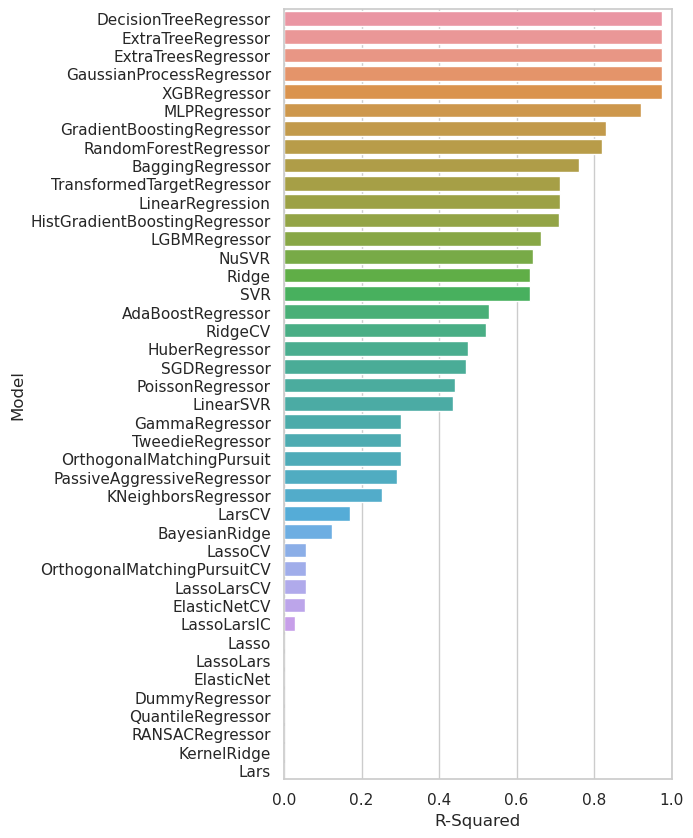

In [87]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

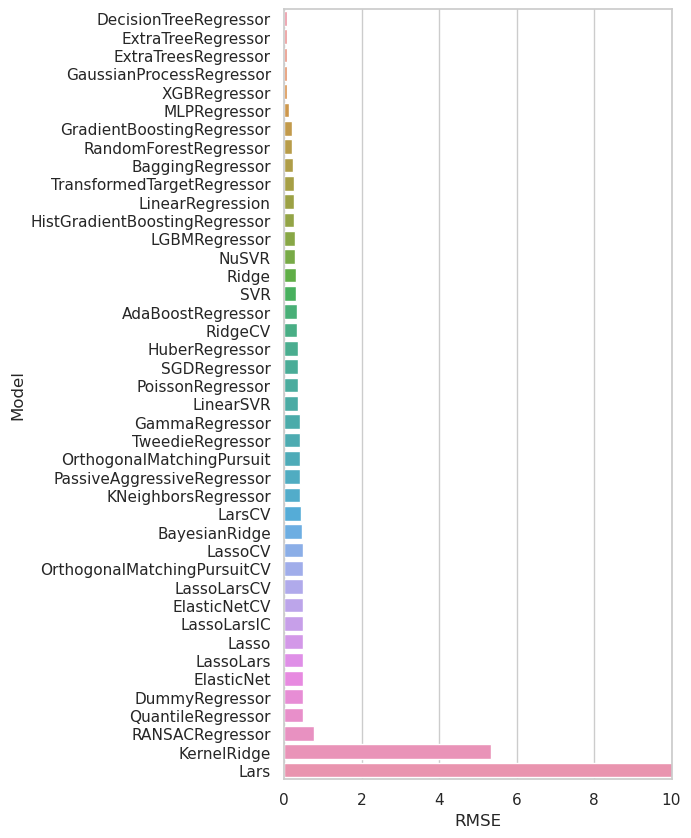

In [88]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

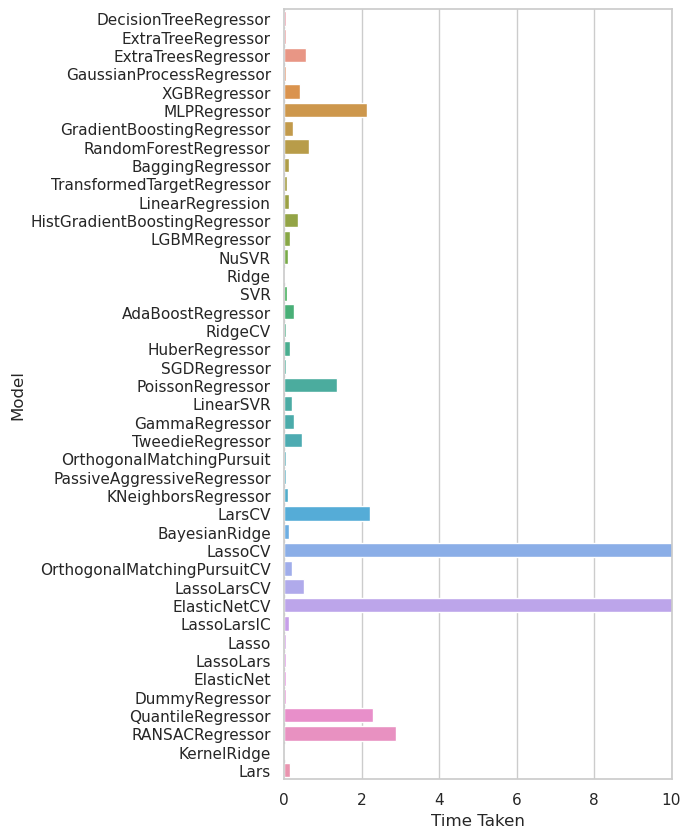

In [89]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))